In [2]:
!pip install -q keras


In [4]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
data_path=os.listdir('/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset') 
# in this link consist data for train and test in image formate

In [6]:
print(data_path) # in folder as two folders such as female and male

['male', 'femal', '.ipynb_checkpoints']


In [ ]:
roomtypes=os.listdir('/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset') 

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset'
rooms=[]
for item in roomtypes:
  all_rooms=os.listdir(path+'/'+item) # this line enter into each folder
  for room in all_rooms:
    s=(item, str(path+'/'+item)+'/'+room) # this line used to take images 
    rooms.append(s)# take the images put in the empty list rooms
rooms # print folder names and images 

[('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/091073.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/090553.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/090586.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/090894.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/090548.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/090648.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/090965.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/090665.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/091053.jpg.jpg'),
 ('male',
  '/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/091028.jpg.jpg'),
 ('male',


In [ ]:
face_reaction=pd.DataFrame(data=rooms,columns=['reaction_type','images']) # this data converted into data frame
face_reaction.head()

,reaction_type,images
0,male,/content/drive/MyDrive/Colab Notebooks/alexnet...
1,male,/content/drive/MyDrive/Colab Notebooks/alexnet...
2,male,/content/drive/MyDrive/Colab Notebooks/alexnet...
3,male,/content/drive/MyDrive/Colab Notebooks/alexnet...
4,male,/content/drive/MyDrive/Colab Notebooks/alexnet...


In [ ]:
face_reaction['reaction_type'].value_counts()

male     200
femal    200
Name: reaction_type, dtype: int64

In [ ]:
import cv2
path='/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/'
im_size=227
images=[]
labels=[]
for i in roomtypes:
  data_path=path+str(i)                                           ### this code says resize images into 227*227*3 and separate images and folder names
  filenames=[i for i in os.listdir(data_path)]
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)

In [ ]:
images=np.array(images) # this imges converted into array type

In [ ]:
images.shape

(400, 227, 227, 3)

In [ ]:
labels

['male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 

In [ ]:
images=images.astype('float32')/255.0 # all image pixels color values reduced to 0 to 1

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # this will used convet categorical target vales in to 1 ans 0 

from sklearn.compose import ColumnTransformer

In [ ]:
y=face_reaction['reaction_type'].values

In [ ]:
y_labelencoder=LabelEncoder()

In [ ]:
y=y_labelencoder.fit_transform(y)

In [ ]:
y=y.reshape(-1,1)



In [ ]:
ct = ColumnTransformer([("reaction_type", OneHotEncoder(), [0])], remainder = 'passthrough')

In [ ]:
y = ct.fit_transform(y)

In [ ]:
y.shape

(400, 2)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
from sklearn.model_selection import train_test_split as tts # split the data

In [ ]:
images,y=shuffle(images,y,random_state=1)

In [ ]:
trian_images,test_images,trian_labels,test_labels=tts(images,y,test_size=0.25,random_state=415)

In [ ]:
trian_images.shape

(300, 227, 227, 3)

In [ ]:
test_images.shape

(100, 227, 227, 3)

In [ ]:
trian_labels.shape

(300, 2)

In [ ]:
test_labels.shape

(100, 2)

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization




# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.7))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.7))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.7))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_81 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_82 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 256)      

In [ ]:
## check points and compli the model
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
NUM_EPOCH = 90
# learning rate
LEARN_RATE = 1.0e-4     

checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=1, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=LEARN_RATE), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_details = model.fit(trian_images,trian_labels,
                    batch_size = 128, # each bach take 128 images randomly
                    epochs = NUM_EPOCH, # number of iterations
                    validation_data= (test_images, test_labels), 
                    callbacks=[checkpoint],
                    verbose=1)











   

Epoch 1/90
3/3 [==============================] - 2s 256ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 3.8319 - val_accuracy: 0.5700

Epoch 00001: val_loss improved from inf to 3.83192, saving model to best_model_improved.h5
Epoch 2/90
3/3 [==============================] - 1s 156ms/step - loss: 0.0359 - accuracy: 0.9900 - val_loss: 5.6159 - val_accuracy: 0.5700

Epoch 00002: val_loss did not improve from 3.83192
Epoch 3/90
3/3 [==============================] - 0s 143ms/step - loss: 0.0845 - accuracy: 0.9600 - val_loss: 5.6062 - val_accuracy: 0.5700

Epoch 00003: val_loss did not improve from 3.83192
Epoch 4/90
3/3 [==============================] - 0s 142ms/step - loss: 0.0389 - accuracy: 0.9833 - val_loss: 5.3273 - val_accuracy: 0.5700

Epoch 00004: val_loss did not improve from 3.83192
Epoch 5/90
3/3 [==============================] - 0s 144ms/step - loss: 0.0474 - accuracy: 0.9900 - val_loss: 5.4049 - val_accuracy: 0.5700

Epoch 00005: val_loss did not improve from 3.83192


In [ ]:
## test the  model

img1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/alexnet/dataset/dataset/male/090545.jpg.jpg') # image path
img=cv2.resize(img1,(227,227)) # image resize

In [ ]:
images=np.array(img)# conveted into array type

In [ ]:
images=images.astype('float32')/255.0 # convertb pixel color range imto 0 to 1

In [ ]:
import tensorflow as tf
img=tf.reshape(images,shape=[-1,227,227,3]) # image reshape into 4 dimensions

In [ ]:
pre=model.predict(img)#  predict the model

In [ ]:
pre

array([[0.0105534, 0.9915249]], dtype=float32)

In [ ]:
prid= np.argmax(pre, axis=1)
prid[0]

1

In [ ]:
names={0:'female',1:'male'}
print(names[prid[0]])

male


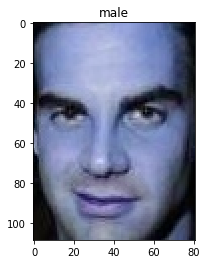

In [ ]:

plt.imshow(img1) 
plt.title(names[prid[0]])
plt.show()

In [ ]:
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 78kB/s 
